In [18]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import warnings
import matplotlib.path as mpath
import cartopy.feature as cfeature

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from cmocean import cm
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs

We are struggling to see a good response signal in the air-sea co2 flux from the winds. why?


xx- notebook here

We see that the wind increases are sorta limited to certain latitude bands:
https://nbviewer.org/github/tjarnikova/SOZONE/blob/master/windAnalyis/LatitudinalWinds.ipynb

Here are the latitudinal bands I've decided to work with:

In [27]:
def plot_southern(fig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, tticks, northex = -50, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -30], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax,
                     transform=ccrs.PlateCarree())
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))
    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = fs)
        cb.set_ticks(tticks, fontsize = 105)
        cb.ax.tick_params(labelsize=16)
    return cb

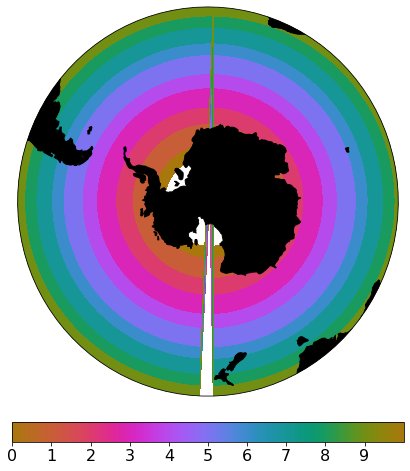

In [30]:
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')
nav_lat = basin['Y'][:]
nav_lon = basin['X'][:]

lons = nav_lon[0:50,:]
lats = nav_lat[0:50,:]

tdat = np.zeros_like(lats)
bounds = np.array([0,7,16,22,28,32,37,40,44,47,50])

for i in range(0,len(bounds)-1):
    tdat[bounds[i]:bounds[i+1],:] = i


tvmin = 0;tvmax = 10

fact = 0.4
ticks = np.arange(0,10,1); tfs = 12

tfig = plt.figure(figsize=[20*fact, 20*fact])
ax1 = tfig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0, -90))

cb = plot_southern(tfig, ax1, lons, lats, tdat, tvmin, 
                  tvmax, ticks, northex = -35, fs = tfs,
                  tit = '', cbarlab = '', tcmap = cm.phase, lm = True, cbr = True)
